![title](image/title.png)
# THIS REPOSITORY IS CREATED BY:
Ng Crew

1. Sebastian Cahyo Ardhi Iswara 1103174174
2. Adli Farhan Ibrahim 1103174092

![title](image/workflow.png)
# PROJECT WORKFLOW:

1. Data Collection
2. Data Preprocessing
3. Data Normalization
4. Model Training
5. Model Validation

# DEPEDENCY TO RUN THIS PROJECT:

1. Python 3.XX (Im using 3.77)
2. Jupyterlab (For run ipynb / notebook)
3. Pandas (For data analysis and processing)
4. matplotlib (For data visualization and Dependency for seaborn)
5. seaborn (For data visualization)
4. Sklearn (For data preprocessing and machine learning algorithm)

# I. MODULE IMPORT
import the module that we use to on this project

In [182]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

# 1. DATA COLLECTION
we need to collect our data. We use Bank Marketing Data Set from UCI Dataset, the goals of this dataset is to campaigns  bank term deposit subcribe 

dataset source: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

![title](image/dataset.png)

# bank client data:
1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

# related with the last contact of the current campaign:

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

# social and economic context attributes

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)


Output variable (desired target):

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [183]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('dataset/bank-additional-full.csv',sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# 2. DATA PREPROCESSING
after the data already loaded, we must check the data is there a duplicate data or null value because machine learning algorithm can take it

In [185]:
df.isna().sum() / len(df)

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64

In [186]:
for col in df.columns:
    print(f'{df[col].value_counts()}\n')

31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
89       2
91       2
87       1
94       1
95       1
Name: age, Length: 78, dtype: int64

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

no         33950


job,marital,education,default,housing,loan  have a unknown value, we can assume that unknown value is equal to NaN / missing value, so we must remove it

In [187]:
df_new = df[(df['job'] != 'unknown') & (df['marital'] != 'unknown') & (df['education'] != 'unknown') & (df['default'] != 'unknown') & (df['housing'] != 'unknown') & (df['loan'] != 'unknown')]

In [188]:
for col in df_new.columns:
    print(f'{df_new[col].value_counts()}\n\n')

31    1643
32    1555
33    1524
30    1441
34    1431
      ... 
91       2
89       2
94       1
87       1
95       1
Name: age, Length: 76, dtype: int64


admin.           8737
blue-collar      5675
technician       5473
services         2857
management       2311
retired          1216
self-employed    1092
entrepreneur     1089
unemployed        738
housemaid         690
student           610
Name: job, dtype: int64


married     17492
single       9443
divorced     3553
Name: marital, dtype: int64


university.degree      10412
high.school             7699
professional.course     4321
basic.9y                4276
basic.4y                2380
basic.6y                1389
illiterate                11
Name: education, dtype: int64


no     30485
yes        3
Name: default, dtype: int64


yes    16521
no     13967
Name: housing, dtype: int64


no     25720
yes     4768
Name: loan, dtype: int64


cellular     20443
telephone    10045
Name: contact, dtype: int64


may    9733
jul    50

Dataset is already NaN free, lets check is there duplicate instance or not

In [189]:
df_new.shape

(30488, 21)

The total NaN Value of our data is about 25%

In [190]:
df_new[df_new.duplicated() == True].shape

(10, 21)

our dataset has 10 duplicate data, we need to elimate duplicate data

In [191]:
df_new = df_new.drop_duplicates(keep='last')

In [192]:
df_new.shape

(30478, 21)

In [193]:
df_new.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


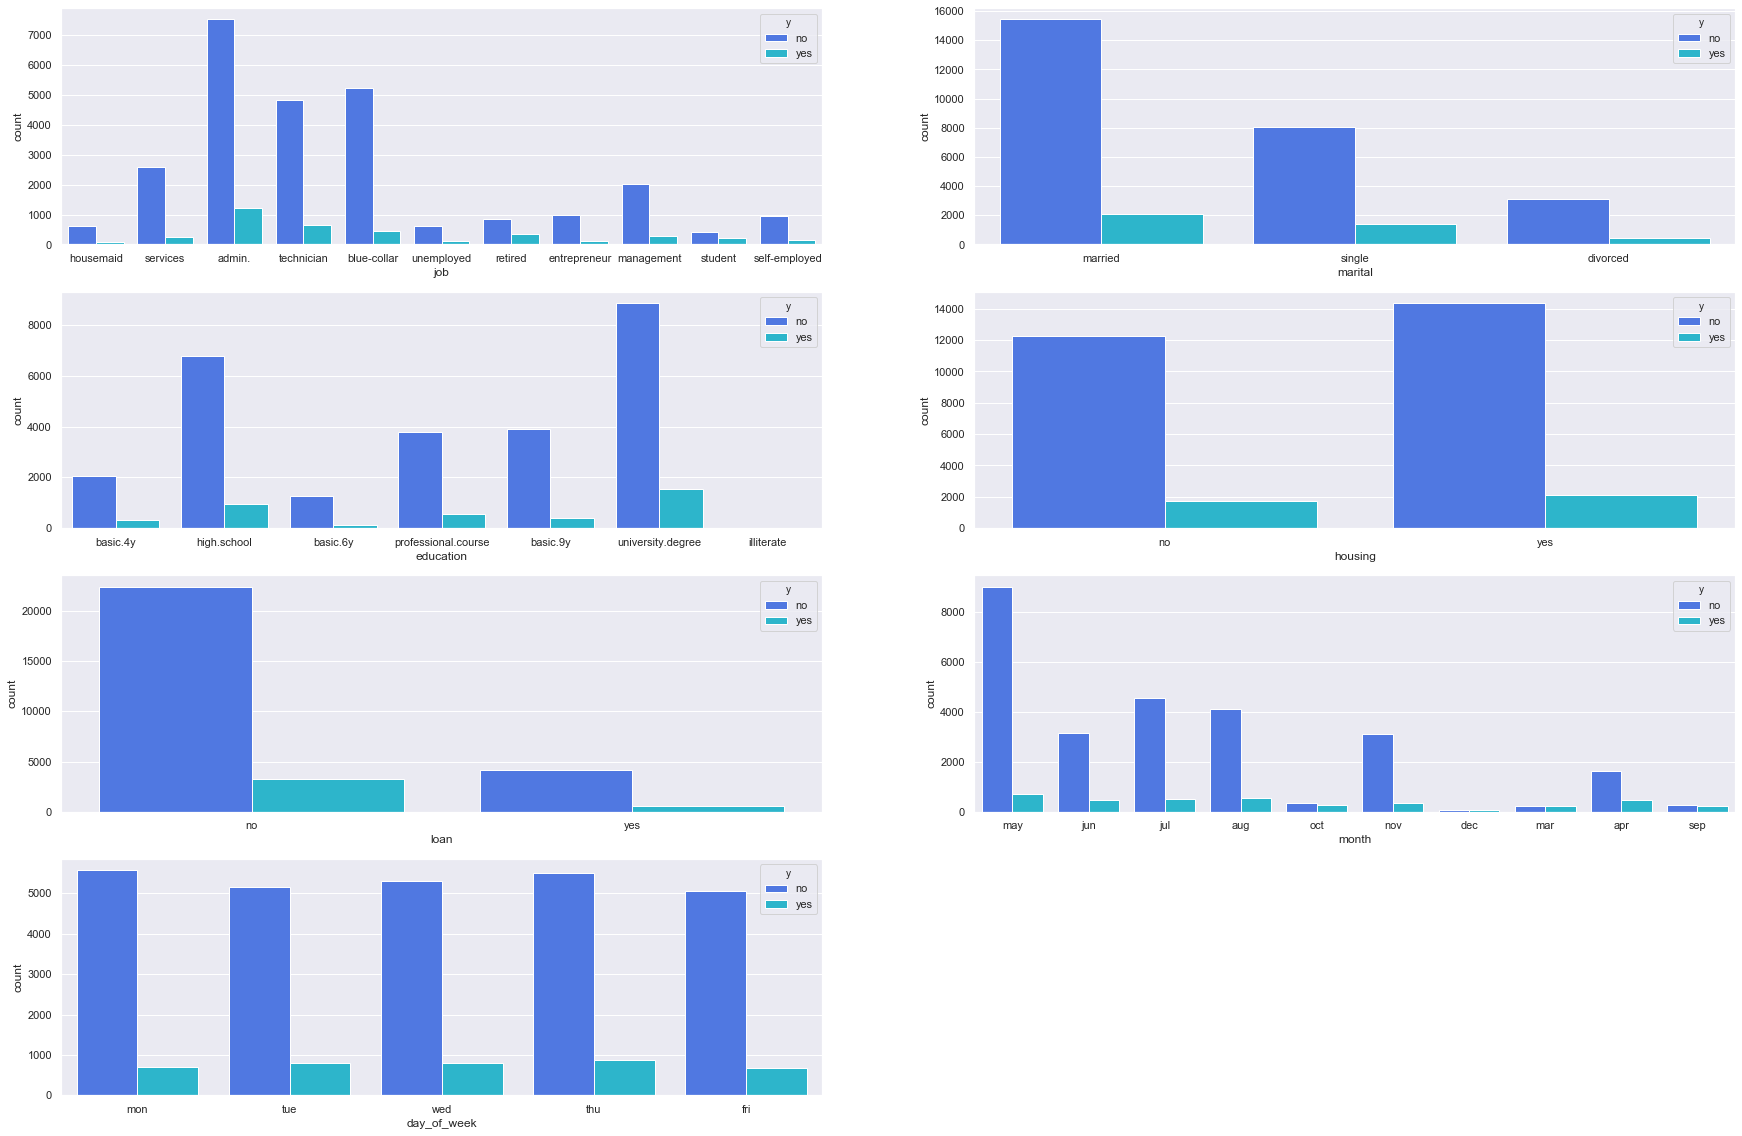

In [194]:
sns.set()
sns.set_palette('rainbow')
plt.figure(figsize=[30,20])

plt.subplot(4,2,1)
sns.countplot(df_new['job'],hue=df_new['y'])


plt.subplot(4,2,2)
sns.countplot(df_new['marital'],hue=df_new['y'])

plt.subplot(4,2,3)
sns.countplot(df_new['education'],hue=df_new['y'])

plt.subplot(4,2,4)
sns.countplot(df_new['housing'],hue=df_new['y'])

plt.subplot(4,2,5)
sns.countplot(df_new['loan'],hue=df_new['y'])

plt.subplot(4,2,6)
sns.countplot(df_new['month'],hue=df_new['y'])

plt.subplot(4,2,7)
sns.countplot(df_new['day_of_week'],hue=df_new['y'])

our customer have high chance rate to accept our marketing with these criteria:
* Admin Job
* University Degree
* Dont have loan
* Thuesday
* Married
* Have House
* In May


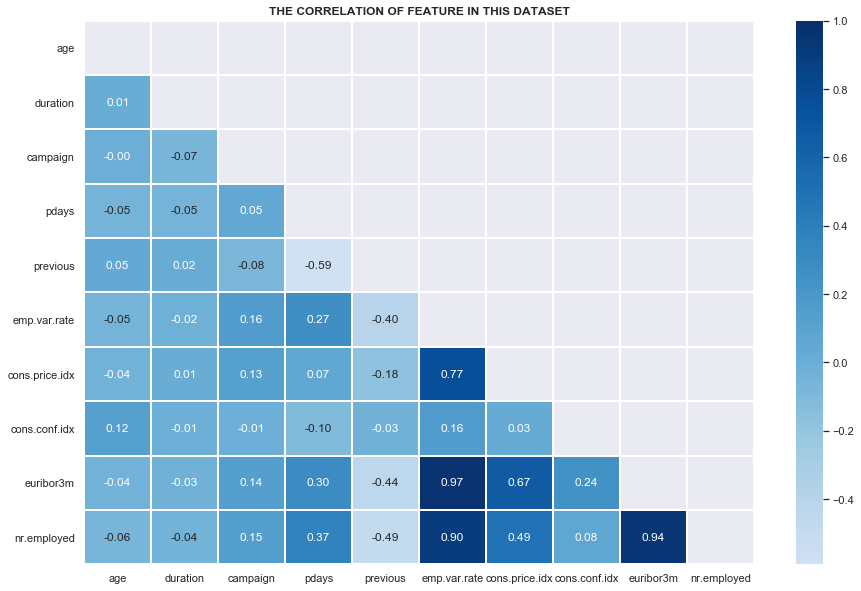

In [195]:
sns.set()
corr = df_new.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=[15,10])
plt.title('THE CORRELATION OF FEATURE IN THIS DATASET',fontweight='bold')
sns.heatmap(corr, mask=mask, cmap='Blues', center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

There 3 column that have feature that has high corelation, we must drop these feature so our model can get work well

In [196]:
df_new = df_new.drop(['euribor3m','nr.employed','cons.price.idx'],axis=1)

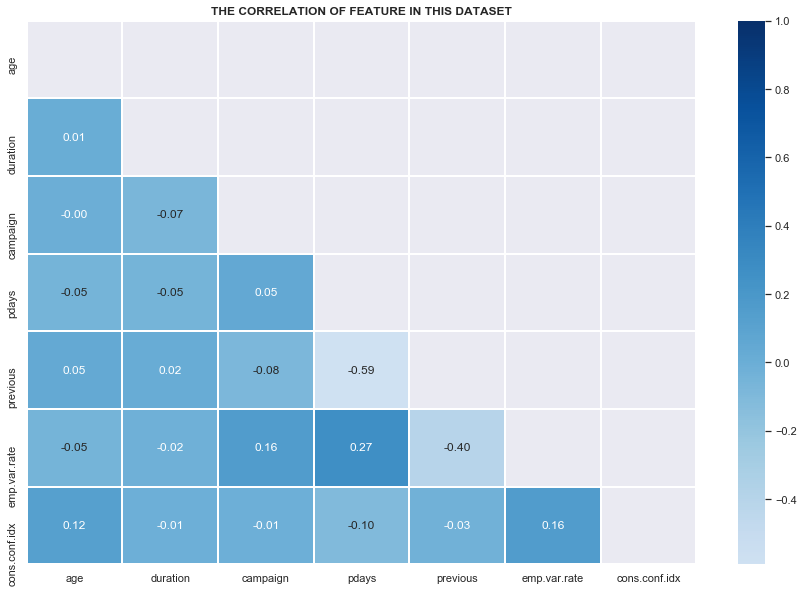

In [197]:
sns.set()
corr = df_new.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=[15,10])
plt.title('THE CORRELATION OF FEATURE IN THIS DATASET',fontweight='bold')
sns.heatmap(corr, mask=mask, cmap='Blues', center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

Our data is clean, lets check our target variable balance

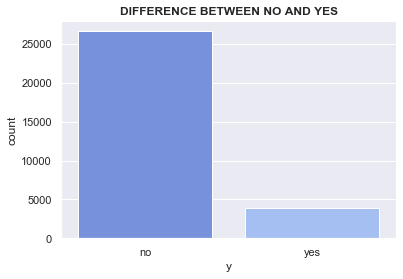

In [198]:
sns.set_palette('coolwarm')
sns.countplot(df_new['y'])
plt.title('DIFFERENCE BETWEEN NO AND YES',fontweight='bold')
plt.show()

In [199]:
df_new['y'].value_counts() / len(df_new)

no     0.873417
yes    0.126583
Name: y, dtype: float64

Our data is not well balance, this not good, our model can't predict well if we still use this data, we must balance the target variable in 1:1 ratio

In [200]:
y_no = df_new[df_new['y'] == 'no']
y_yes = df_new[df_new['y'] == 'yes']

In [201]:
dummy = df_new
y_no = y_no.sample(len(y_yes),random_state=46)
df_new = pd.concat([y_no,y_yes])

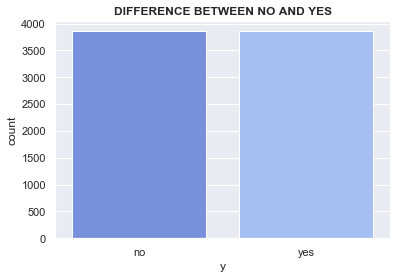

In [202]:
sns.set_palette('coolwarm')
sns.countplot(df_new['y'])
plt.title('DIFFERENCE BETWEEN NO AND YES',fontweight='bold')
plt.show()

# 4. DATA NORMALIZATION

In [203]:
numeric = ['age','duration','campaign','pdays','previous','emp.var.rate','cons.conf.idx']
for col in df_new[numeric]:
    df_new[col] = RobustScaler().fit_transform(df_new[[col]])
    dummy[col] = RobustScaler().fit_transform(dummy[[col]])

Our data right now well balance and already normalization using robustscaler too, lets split our data into feature X and target variable y

In [204]:
y = df_new['y']
X = df_new.drop('y',axis=1)

y_dummy = dummy['y']
X_dummy = dummy.drop('y',axis=1)

In [205]:
X = pd.get_dummies(X)

X_dummy = pd.get_dummies(X_dummy)

In [206]:
X.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.conf.idx,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_no,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
27656,0.0625,-0.636103,0.5,0.0,0.0,0.31250,-0.020408,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
38280,0.5000,-0.378223,0.0,0.0,0.0,-0.71875,1.520408,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
36184,1.0625,-0.326648,0.5,-993.0,1.0,-0.21875,-0.448980,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
14541,-0.6250,0.710602,2.0,0.0,0.0,0.78125,-0.091837,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
40525,-0.4375,-0.713467,-0.5,0.0,0.0,-0.18750,0.357143,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


# 4. Model Training
Before we do model training, we must split the data to 2 type, which is training data and test data

In [207]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,stratify=y,random_state=46)

X_train_dum, X_test_dum, y_train_dum, y_test_dum = train_test_split(X_dummy,y_dummy,test_size=0.25,stratify=y_dummy,random_state=46)

Fit our Logistic Regression model to our dataset

In [222]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

lr_dummy = LogisticRegression()
lr_dummy.fit(X_train_dum,y_train_dum)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Check the accuracy

In [211]:
print(accuracy_score(y_test,lr.predict(X_test)))

0.8522550544323484


Check the F1 Score of our data

In [212]:
print(confusion_matrix(y_test,lr.predict(X_test)))

[[806 158]
 [127 838]]


In [213]:
print(classification_report(y_test,lr.predict(X_test)))

precision    recall  f1-score   support

          no       0.86      0.84      0.85       964
         yes       0.84      0.87      0.85       965

    accuracy                           0.85      1929
   macro avg       0.85      0.85      0.85      1929
weighted avg       0.85      0.85      0.85      1929



In [224]:
print(accuracy_score(y_test_dum,lr_dummy.predict(X_test_dum)))

0.9006561679790026


In [225]:
print(classification_report(y_test_dum,lr_dummy.predict(X_test_dum)))

precision    recall  f1-score   support

          no       0.92      0.97      0.94      6655
         yes       0.67      0.43      0.52       965

    accuracy                           0.90      7620
   macro avg       0.79      0.70      0.73      7620
weighted avg       0.89      0.90      0.89      7620



# 5. Hyperparameter Tuning
-+  80% of F1 Score, not bad, but we want to push our limit to the boundary, so right now we will hypterparameter tuning our model

In [227]:
lr.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [217]:
param = {'C' : [0.0001,0.001,0.01,0.1,1], 'class_weight' : ['dict','balanced',None], 'dual' : [True,False], 'fit_intercept' : [True,False], 'intercept_scaling' : [0.0001,0.001,0.01,0.1,1], 'l1_ratio' : [0.0001,0.001,0.01,0.1,1], 'max_iter' : [1,100,1000], 'multi_class' : ['auto','ovr','multinominal'],'penalty' : ['l1','l2','none','liblinear'] , 'random_state' : [46,48], 'solver' : ['newton-cg','lbfgs','liblinear','sag','saga'], 'tol' : [0.0001,0.001,0.01,0.1,1], 'verbose' : [0.0001,0.001,0.01,0.1,1], 'warm_start' : [True,False]}

In [228]:
lr_new = RandomizedSearchCV(LogisticRegression(),param,random_state=46,n_iter=20)
lr_new.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
max_iter reached after 5 seconds
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'...
                                        'multi_class': ['auto', 'ovr',
                                                        'multinominal'],
                                        'penalty': ['l1', 'l2', 'none',
                 

In [229]:
lr_new.best_params_

{'warm_start': True,
 'verbose': 1,
 'tol': 1,
 'solver': 'lbfgs',
 'random_state': 48,
 'penalty': 'none',
 'multi_class': 'ovr',
 'max_iter': 1000,
 'l1_ratio': 0.0001,
 'intercept_scaling': 0.001,
 'fit_intercept': False,
 'dual': False,
 'class_weight': 'balanced',
 'C': 0.1}

Now we know, that our best hyperparameter setting is above

In [230]:
print(accuracy_score(y_test,lr_new.predict(X_test)))

0.8512182477967859


In [231]:
print(classification_report(y_test,lr_new.predict(X_test)))

precision    recall  f1-score   support

          no       0.86      0.84      0.85       964
         yes       0.84      0.87      0.85       965

    accuracy                           0.85      1929
   macro avg       0.85      0.85      0.85      1929
weighted avg       0.85      0.85      0.85      1929



# Our model now is pretty good and ready to deploy into production :)